In [3]:
from aleph_alpha_client import ImagePrompt, AlephAlphaClient
from pathlib import Path
import io


token = MY_TOKEN
apicalls = 0

client = AlephAlphaClient(
    host="https://api.aleph-alpha.de",
    token=token,
)



def complete(prompt):
    global apicalls
    try:
        result = client.complete(
            model="PreviewBetaMultimodal",
            prompt=prompt,
            maximum_tokens=len(prompt)+14,
            temperature=0.7,
            stop_sequences=['\n', "'"],
            frequency_penalty=0.4,
            repetition_penalties_include_prompt=True
        )
        apicalls = apicalls +1
    except Exception as e:
        print(e)
        result = str(e)
    return result

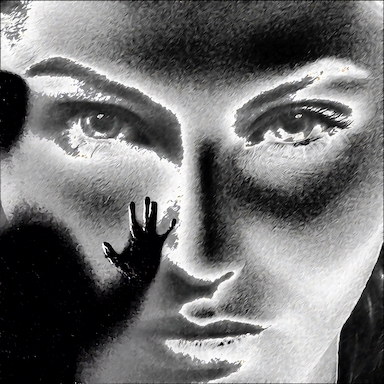

1
2
3
The face of a woman


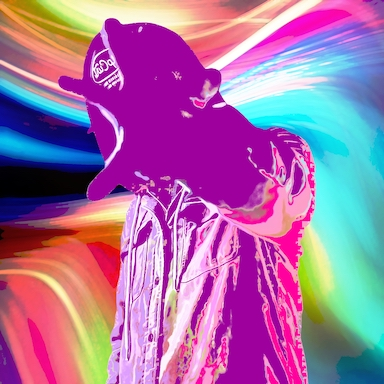

1
2
The Last Bitcoin


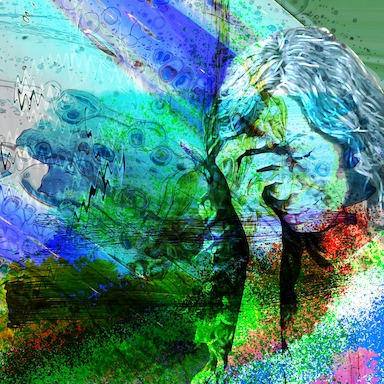

1
2
What is she crying about?


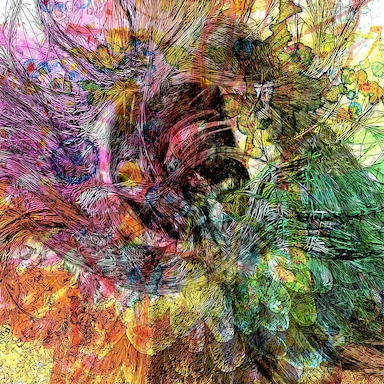

1
Red Dragon in the Clouds


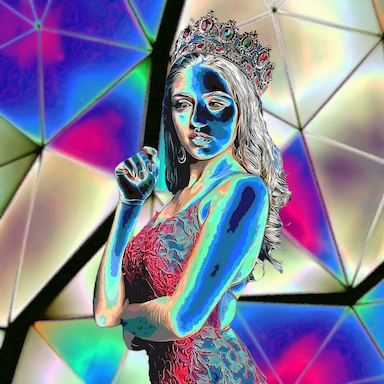

KeyboardInterrupt: 

In [4]:

def list_of_files(directory):
    return [path for path in Path(directory).iterdir() if path.is_file()]


from IPython.display import Image 

# Let's get all the (few-shot) prompt pieces.
prompts = [
    "Last night, I was gazing up into the stars when suddenly I knew what to call my artwork:",
    "My artist friend, high on LSD, texted me last night. His message was short and sounded like the name of a cryptic painting:",
    "Seeing this magnificient artwork makes me think of this one poem titled:",
    "A dream like this, a vision after all, my friend. It was called",
    "I had this crazy dream, there was a flashing bright light, and something named",
    "Q: What's this extravagant work of art called?\nA:"
]


prompts = [
 "A close friend of the creator PEEZMO is a cyberpunk nerd who likes Bitcoins and Crypto. He gave me the following title for this picture:"
]
   

# Let's get all files in our directory.
directory = "images"
file_list = list_of_files(directory)

# Let's generate some stuff!
mode = "title"
sample_size = 1
apicalls = 0
nimages = 0


for image_file in file_list:
    i = Image(image_file)
    display(i)
    for prompt in prompts:
        image = ImagePrompt.from_file(image_file)

        nimages = nimages + 1

        complete_prompt = [
            image, prompt
        ]
       
        results = {
            "prompt": prompt,
            "image": image_file.name,
            "results": []
        }
    
        for i in range(sample_size):
            result = complete(complete_prompt)
            #print(result)
            r = result["completions"][0]["completion"].strip()
            tries = 0
            maxtries = 20
            #iron out the quirks: (too short, too long, <PERSON> tag)
            while ((len(r) < 5) or (len(r)>30) or ("PERSON" in r)) and (tries < maxtries):       
                result = complete(complete_prompt)
                r = result["completions"][0]["completion"].strip()
                tries = tries + 1 
                print(tries)
            else:
                #flatten return string 
                your_string = r                
                for sc in ["'",".","|",","]:
                     your_string = your_string.split(sc)[0]
                your_string=your_string.replace("`", "")        
                print(your_string) 
                
print("ALL DONE")
print(apicalls, " API Calls for ", nimages, " images.")